In [2]:
import pandas as pd
import numpy as np

In [3]:
import nltk.data
from nltk.stem.porter import *
#pd.options.mode.chained_assignment = None
import os
import nltk
from textblob import TextBlob

In [4]:
pwd

'/Users/pradeepvaddigadda'

In [ ]:
tweets_df=pd.read_csv("pulwama_tweets.csv")

In [ ]:
tweets_df.head()

In [ ]:
tweets_df.isnull().sum()

In [ ]:
tweets_df['text'].fillna('pulwama attack',inplace = True)
tweets_df['text'] = tweets_df['text'].apply(lambda x : 'Pulwama attack' if x.startswith('http') else x)
tweets_df['location'].fillna('india',inplace = True)
tweets_df['location'] = tweets_df['location'].apply(lambda x : x.lower())
tweets_df['location'] = tweets_df['location'].apply(lambda x : 'india' if x.endswith('भारत') else x)
tweets_df['location'] = tweets_df['location'].apply(lambda x : 'india' if x.startswith('भारत') else x)
tweets_df['location'] = tweets_df['location'].apply(lambda x : 'india' if x.startswith('हिन्दू') else x)

In [ ]:
tweets_df['location'].fillna('india',inplace = True)

In [ ]:
tweets_df.isnull().sum()

In [ ]:
tweets_df.drop('description', axis=1, inplace=True)
tweets_df.drop('url', axis=1, inplace=True)

In [ ]:
tweets_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
tweets_df.isnull().sum()

In [ ]:
tweets_df['name'].fillna('indian',inplace = True)
tweets_df['followers'].fillna('0',inplace = True)
tweets_df['datetime'].fillna('Wed Feb 20 06:57:25 +0000 2019',inplace = True)

In [ ]:
tweets_df.isnull().sum()

In [ ]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

tweets_df['text'] = tweets_df['text'].apply(clean_text_round1)

In [ ]:
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets_df['text'] = tweets_df['text'].apply(lambda x: re.sub('  ', ' ', x))
tweets_df['text'][1]

In [ ]:
for i in range(len(tweets_df['text'])):
    tweets_df['text'][i] = " ".join([word for word in tweets_df['text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets_df['text'][1]

In [ ]:
tweets_df['text'][10]

In [ ]:
tweets_df['text'][5]

In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
tweets_df['text']= tweets_df['text'].apply(remove_emojis)

In [ ]:
tweets_df['text'][15]

In [ ]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text =re.sub('|','',text)
    return text
tweets_df['text'] = tweets_df['text'].apply(clean_text_round2)

In [ ]:
tweets_df.head()

In [ ]:
import pandas as pd

In [ ]:
pwd

In [ ]:
#cd /Users/pradeepvaddigadda/downloads

In [ ]:
sen=pd.read_csv('tweets.csv')

In [ ]:
sen

In [ ]:
sen['text'][0]

In [ ]:
pip install googletrans

In [ ]:
import googletrans

print(googletrans.LANGUAGES)

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
result = translator.translate('rt देश भक्ति के इस जज्बे को भी सलाम है pulwamaattack')

In [ ]:
print(result)

In [ ]:
df=sen.head(10)

In [ ]:
def convert(x):
    try:
        translator = Translator()
        result = translator.translate(x)
        return result.text
    except:
        print('exception occured')


In [ ]:
df['Text'] = df['text'].map(lambda x: convert(str(x)))

In [ ]:
sent=sen.head(1000)

In [ ]:
sent['Text'] = sent['text'].map(lambda x: convert(str(x)))

In [ ]:
sen1=sen[1000:5000]

In [ ]:
sen1['Text'] = sen1['text'].map(lambda x: convert(str(x)))

In [ ]:
sen1

In [ ]:
sen2=sen[5000:10000]

In [ ]:
sen2['Text'] = sen2['text'].map(lambda x: convert(str(x)))

In [ ]:
df=sent.append(sen1,ignore_index=True)

In [ ]:
df1=df.append(sen2,ignore_index=False)

In [ ]:
df1

In [ ]:
cd /Users/pradeepvaddigadda/desktop/text

In [ ]:
df1.to_csv('cleanedfilm_10000.csv', header=True, index=True)

In [ ]:
pwd

In [5]:
cd /Users/pradeepvaddigadda/desktop/text

/Users/pradeepvaddigadda/Desktop/text


In [37]:
df1=pd.read_csv('cleanedfilm_10000.csv')

In [38]:

#df1=pd.read_csv('cleanedfilm_10000.csv')
df2=pd.read_csv('cleanedfilm_10to15.csv')
df13=pd.read_csv('cleanedfilm_10to15.csv')
df3=pd.read_csv('cleanedfilm_20to25.csv')
df4=pd.read_csv('cleanedfilm_25to30.csv')
df5=pd.read_csv('cleanedfilm_30to35.csv')
df6=pd.read_csv('cleanedfilm_35to40.csv')
df7=pd.read_csv('cleanedfilm_40to45.csv')
df8=pd.read_csv('cleanedfilm_45to50.csv')
df9=pd.read_csv('cleanedfilm_50to51.csv')
df10=pd.read_csv('cleanedfilm_51to52.csv')
df11=pd.read_csv('cleanedfilm_52to53.csv')
df12=pd.read_csv('cleanedfilm_53to54.csv')


In [39]:
df9

,Unnamed: 0,Unnamed: 0.1,name,location,followers,text,datetime,Text
0,50000,50000,Sho Afridi,"dubai, united arab emirates",61.0,ایسے خبریں صرف لبڑلوں اور خرامخورں کے پاس ملنگ...,Wed Feb 20 14:46:16 +0000 2019,Such news will be available only to the scound...
1,50001,50001,Bhanu Pratap Singh Rawat,india,23.0,पुलवामा में crpf जवानों पर हुए कायराना आतंकवाद...,Wed Feb 20 14:46:17 +0000 2019,In the dastardly terrorist attack on CRPF jawa...
2,50002,50002,Arun GS,india,1.0,meraparivarbajpaparivar i suport namo i suppor...,Wed Feb 20 14:46:17 +0000 2019,meraparivarbajpaparivar i suport namo i suppor...
3,50003,50003,Eddy,pakistan,95.0,pulwamaattack pulwamaterrorattack bollywood ty...,Wed Feb 20 14:46:17 +0000 2019,pulwamaattack pulwamaterrorattack bollywood ty...
4,50004,50004,Pooja Goswami,"rajasthan, india",81737.0,परवेज मुशर्रफ का कहना है कि मसूद अजहर ओर हाफिज...,Wed Feb 20 14:46:17 +0000 2019,Pervez Musharraf says that Masood Azhar and Ha...
...,...,...,...,...,...,...,...,...
995,50995,50995,Pankaj Mandal,indian,51.0,परवेज मुशर्रफ का कहना है कि मसूद अजहर ओर हाफिज...,Wed Feb 20 14:56:21 +0000 2019,Pervez Musharraf says that Masood Azhar and Ha...
996,50996,50996,Choudhary Sombir Lather,budha khera lather,29.0,आज चंडीगढ़ में पुलवामाआतंकीहमलें में शहीद हुए ...,Wed Feb 20 14:56:22 +0000 2019,"Today, candle march was organized on behalf of..."
997,50997,50997,Choudhary Sombir Lather,budha khera lather,29.0,कृस्न करीम राम हरि राघव जब लग एक न पेखा। वेद क...,Wed Feb 20 14:56:22 +0000 2019,Krissin Karim Ram Hari Raghav When Lag Ek Na P...
998,50998,50998,विकाश कुमार - सेकुलरिज्म एक कैंसर है।,ranchi,24.0,opinion even at a critical juncture mamata ban...,Wed Feb 20 14:56:23 +0000 2019,opinion even at a critical juncture mamata ban...


In [40]:
df=pd.concat([df1, df2, df3, df4, df5,df6,df7,df8,df9,df10,df11,df12,df13], ignore_index=True)

In [41]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,name,location,followers,text,datetime,Text
0,0,0,0.0,सिंधु,india,33.0,rt देश भक्ति के इस जज्बे को भी सलाम है pulwama...,Wed Feb 20 06:57:24 +0000 2019,This spirit of rt patriotism is also saluted p...
1,1,1,1.0,Anuj Choudhary,"new delhi, india",36.0,consequences of raised custom duty by india up...,Wed Feb 20 06:57:24 +0000 2019,consequences of raised custom duty by india up...
2,2,2,2.0,Hiten Panjankar 🇮🇳,india,524.0,this is true face of incindia pulwamaattack पर...,Wed Feb 20 06:57:25 +0000 2019,In the debate on this is true face of incindia...
3,3,3,3.0,Narendar Pandey,india,1166.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say..."
4,4,4,4.0,Teju 🇮🇳,"hyderabad, india",117.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say..."
...,...,...,...,...,...,...,...,...,...
53995,14995,14995,NaN,Arpan,india,26.0,saudi arabian crown prince mohammed bin salman...,Wed Feb 20 09:14:16 +0000 2019,saudi arabian crown prince mohammed bin salman...
53996,14996,14996,NaN,Rajesh Kapoor,india,302.0,okcongi media burnol shoppers today is your ru...,Wed Feb 20 09:14:16 +0000 2019,okcongi media burnol shoppers today is your ru...
53997,14997,14997,NaN,B K Singh,india,590.0,pulwamaattack बाद जब राष्ट्र मांग रहा आतंकियों...,Wed Feb 20 09:14:16 +0000 2019,"After the pulwamaattack, when the nation was c..."
53998,14998,14998,NaN,Abhishek Singh,lucknow u.p.,0.0,soldier send love for his bride from border ar...,Wed Feb 20 09:14:16 +0000 2019,soldier send love for his bride from border ar...


In [42]:
import nltk.data
from nltk.stem.porter import *
#pd.options.mode.chained_assignment = None
import os
import nltk
from textblob import TextBlob

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#df=df['Text'].astype(str)

In [46]:
df.shape

(54000, 9)

In [47]:
tweetsdf=df

In [48]:
df.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Unnamed: 0.1.1    44000
name                  0
location              0
followers             0
text                 81
datetime              0
Text                  4
dtype: int64

In [49]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],1,inplace=True)

In [50]:
tweetsdf=tweetsdf.dropna()

In [51]:
tweetsdf.shape

(53915, 6)

In [52]:
from textblob import TextBlob
### My input text is a column from a dataframe that contains tweets. 

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

tweetsdf['sentiment'] = tweetsdf['Text'].apply(sentiment)


<ipython-input-52-33cf6c6048e4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsdf['sentiment'] = tweetsdf['Text'].apply(sentiment)


In [53]:
tweetsdf

,name,location,followers,text,datetime,Text,sentiment
0,सिंधु,india,33.0,rt देश भक्ति के इस जज्बे को भी सलाम है pulwama...,Wed Feb 20 06:57:24 +0000 2019,This spirit of rt patriotism is also saluted p...,0.0000
1,Anuj Choudhary,"new delhi, india",36.0,consequences of raised custom duty by india up...,Wed Feb 20 06:57:24 +0000 2019,consequences of raised custom duty by india up...,-0.1625
2,Hiten Panjankar 🇮🇳,india,524.0,this is true face of incindia pulwamaattack पर...,Wed Feb 20 06:57:25 +0000 2019,In the debate on this is true face of incindia...,0.3500
3,Narendar Pandey,india,1166.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500
4,Teju 🇮🇳,"hyderabad, india",117.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500
...,...,...,...,...,...,...,...
53995,Arpan,india,26.0,saudi arabian crown prince mohammed bin salman...,Wed Feb 20 09:14:16 +0000 2019,saudi arabian crown prince mohammed bin salman...,0.0000
53996,Rajesh Kapoor,india,302.0,okcongi media burnol shoppers today is your ru...,Wed Feb 20 09:14:16 +0000 2019,okcongi media burnol shoppers today is your ru...,0.0000
53997,B K Singh,india,590.0,pulwamaattack बाद जब राष्ट्र मांग रहा आतंकियों...,Wed Feb 20 09:14:16 +0000 2019,"After the pulwamaattack, when the nation was c...",-0.1000
53998,Abhishek Singh,lucknow u.p.,0.0,soldier send love for his bride from border ar...,Wed Feb 20 09:14:16 +0000 2019,soldier send love for his bride from border ar...,0.5000


In [54]:
tweetsdf['sentiment'].dtype

dtype('float64')

In [ ]:
tweetsdf['sentiments'] = tweetsdf['sentiment'].apply(sentiment)


In [55]:
tweetsdf

,name,location,followers,text,datetime,Text,sentiment
0,सिंधु,india,33.0,rt देश भक्ति के इस जज्बे को भी सलाम है pulwama...,Wed Feb 20 06:57:24 +0000 2019,This spirit of rt patriotism is also saluted p...,0.0000
1,Anuj Choudhary,"new delhi, india",36.0,consequences of raised custom duty by india up...,Wed Feb 20 06:57:24 +0000 2019,consequences of raised custom duty by india up...,-0.1625
2,Hiten Panjankar 🇮🇳,india,524.0,this is true face of incindia pulwamaattack पर...,Wed Feb 20 06:57:25 +0000 2019,In the debate on this is true face of incindia...,0.3500
3,Narendar Pandey,india,1166.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500
4,Teju 🇮🇳,"hyderabad, india",117.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500
...,...,...,...,...,...,...,...
53995,Arpan,india,26.0,saudi arabian crown prince mohammed bin salman...,Wed Feb 20 09:14:16 +0000 2019,saudi arabian crown prince mohammed bin salman...,0.0000
53996,Rajesh Kapoor,india,302.0,okcongi media burnol shoppers today is your ru...,Wed Feb 20 09:14:16 +0000 2019,okcongi media burnol shoppers today is your ru...,0.0000
53997,B K Singh,india,590.0,pulwamaattack बाद जब राष्ट्र मांग रहा आतंकियों...,Wed Feb 20 09:14:16 +0000 2019,"After the pulwamaattack, when the nation was c...",-0.1000
53998,Abhishek Singh,lucknow u.p.,0.0,soldier send love for his bride from border ar...,Wed Feb 20 09:14:16 +0000 2019,soldier send love for his bride from border ar...,0.5000


In [56]:
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1
tweetsdf['polarity'] = tweetsdf['Text'].apply(analize_sentiment)

<ipython-input-56-4418933b9829>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetsdf['polarity'] = tweetsdf['Text'].apply(analize_sentiment)


In [57]:
tweetsdf

,name,location,followers,text,datetime,Text,sentiment,polarity
0,सिंधु,india,33.0,rt देश भक्ति के इस जज्बे को भी सलाम है pulwama...,Wed Feb 20 06:57:24 +0000 2019,This spirit of rt patriotism is also saluted p...,0.0000,0
1,Anuj Choudhary,"new delhi, india",36.0,consequences of raised custom duty by india up...,Wed Feb 20 06:57:24 +0000 2019,consequences of raised custom duty by india up...,-0.1625,-1
2,Hiten Panjankar 🇮🇳,india,524.0,this is true face of incindia pulwamaattack पर...,Wed Feb 20 06:57:25 +0000 2019,In the debate on this is true face of incindia...,0.3500,1
3,Narendar Pandey,india,1166.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500,-1
4,Teju 🇮🇳,"hyderabad, india",117.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500,-1
...,...,...,...,...,...,...,...,...
53995,Arpan,india,26.0,saudi arabian crown prince mohammed bin salman...,Wed Feb 20 09:14:16 +0000 2019,saudi arabian crown prince mohammed bin salman...,0.0000,0
53996,Rajesh Kapoor,india,302.0,okcongi media burnol shoppers today is your ru...,Wed Feb 20 09:14:16 +0000 2019,okcongi media burnol shoppers today is your ru...,0.0000,0
53997,B K Singh,india,590.0,pulwamaattack बाद जब राष्ट्र मांग रहा आतंकियों...,Wed Feb 20 09:14:16 +0000 2019,"After the pulwamaattack, when the nation was c...",-0.1000,-1
53998,Abhishek Singh,lucknow u.p.,0.0,soldier send love for his bride from border ar...,Wed Feb 20 09:14:16 +0000 2019,soldier send love for his bride from border ar...,0.5000,1


In [28]:
tweetsdf.to_csv('tweets1.csv',header=True)

In [ ]:
tweetsdf.drop(['sentiments'],1,inplace=True)

In [61]:
tweetsdf

,name,location,followers,text,datetime,Text,sentiment,polarity
0,सिंधु,india,33.0,rt देश भक्ति के इस जज्बे को भी सलाम है pulwama...,Wed Feb 20 06:57:24 +0000 2019,This spirit of rt patriotism is also saluted p...,0.0000,0
1,Anuj Choudhary,"new delhi, india",36.0,consequences of raised custom duty by india up...,Wed Feb 20 06:57:24 +0000 2019,consequences of raised custom duty by india up...,-0.1625,-1
2,Hiten Panjankar 🇮🇳,india,524.0,this is true face of incindia pulwamaattack पर...,Wed Feb 20 06:57:25 +0000 2019,In the debate on this is true face of incindia...,0.3500,1
3,Narendar Pandey,india,1166.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500,-1
4,Teju 🇮🇳,"hyderabad, india",117.0,पाकिस्तान के खिलाफ डिबेट में अगर कोई कहता है क...,Wed Feb 20 06:57:25 +0000 2019,"In the debate against Pakistan, if someone say...",-0.0500,-1
...,...,...,...,...,...,...,...,...
53995,Arpan,india,26.0,saudi arabian crown prince mohammed bin salman...,Wed Feb 20 09:14:16 +0000 2019,saudi arabian crown prince mohammed bin salman...,0.0000,0
53996,Rajesh Kapoor,india,302.0,okcongi media burnol shoppers today is your ru...,Wed Feb 20 09:14:16 +0000 2019,okcongi media burnol shoppers today is your ru...,0.0000,0
53997,B K Singh,india,590.0,pulwamaattack बाद जब राष्ट्र मांग रहा आतंकियों...,Wed Feb 20 09:14:16 +0000 2019,"After the pulwamaattack, when the nation was c...",-0.1000,-1
53998,Abhishek Singh,lucknow u.p.,0.0,soldier send love for his bride from border ar...,Wed Feb 20 09:14:16 +0000 2019,soldier send love for his bride from border ar...,0.5000,1


In [63]:
import matplotlib.pyplot as plt

In [74]:
Neutral=0
Positive=0
Negative=0
for i in tweetsdf['polarity']:
    if i==0:
        Neutral=Neutral+1
    elif i==1:
        Positive=Positive+1
    else:
        Negative =Negative+1
print(Neutral)
print(Positive)
print(Negative)

53915

24237
17482
12196


Total Positive =  17482
Total Negative =  12196
Total Neutral =  24237


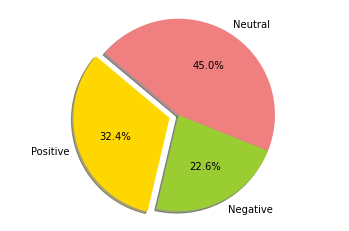

In [78]:
Neutral=0
Positive=0
Negative=0
for i in tweetsdf['polarity']:
    if i==0:
        Neutral=Neutral+1
    elif i==1:
        Positive=Positive+1
    else:
        Negative =Negative+1
print("Total Positive = ", Positive)
print("Total Negative = ", Negative)
print("Total Neutral = ", Neutral)

#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [Positive, Negative, Neutral]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

